# Notes

## Week 1 Lesson 1: Welcome + course overview
1 - 23 May 2017

### Course overview
* First, get a basic level of all the different areas of Data Science - theory, programming, statistics, visualisation, communication, subject matter expertise.
* Then get to go into further detail in more advanced areas.

### Additional readings
* Python for Data Analysis:  http://shop.oreilly.com/product/0636920023784.do
* Command Line Crash Course: http://cli.learncodethehardway.org/book/

----

## Week 1 Lesson 2: Git + Github, Numpy + Pandas
2 - 25 May 2017

### Git
* Version control system that allows you to track files and file changes in a repository (“repo”)
* Primarily used by software developers
* Most widely used version control system
* Alternatives: Mercurial, Subversion, CVS
* Runs from the command line (usually)
* Can be used alone or in a team


### Github
* Allows you to put your Git repos online
* Alternative: Bitbucket
* Benefits of GitHub:
 * Backup of files
 * Visual interface for navigating repos
 * Makes repo collaboration easy
* Git does not require GitHub

<img src=git_chart.png width=500 align=left>

### Numpy

* Numpy can be used to perform general maths functions, and also create arrays of data!

In [ ]:
import numpy as np

In [ ]:
a = np.array( [20,30,40,50] )
a

In [ ]:
b = np.arange(4)
b

In [ ]:
c = a-b
c

In [ ]:
d = b*2
d

In [ ]:
e = np.random.randint(1,10,(2,3,4))
e

In [ ]:
e[:1]

### Pandas
* Pandas is all about that reading. You can read files using pandas, including CSV files, URLs.

In [ ]:
import pandas as pd

#### Importing data

In [ ]:
pd.read_table('../data/u.user', header=None)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('../data/u.user', sep='|', header=None, names=user_cols, index_col='user_id', dtype={'zip_code':str})

#### Exploring the data

In [ ]:
users                   # print the first 30 and last 30 rows
type(users)             # DataFrame
users.head()            # print the first 5 rows
users.head(10)          # print the first 10 rows
users.tail()            # print the last 5 rows
users.index             # "the index" (aka "the labels")
users.columns           # column names (which is "an index")
users.dtypes            # data types of each column
users.shape             # number of rows and columns
users.values            # underlying numpy array
users.info()            # concise summary (including memory usage)

In [ ]:
#users['gender']         # select one column
#type(users['gender'])   # Series
#users[['gender']]
#type(users[['gender']])   # DataFrame
#users.gender            # select one column using the DataFrame attribute

In [ ]:
#users.describe()                    # describe all numeric columns
#users.describe(include=['object'])  # describe all object columns (can include multiple types)
#users.describe(include='all')       # describe all columns
#users.gender.describe()             # describe a single column
users.age.mean()                    # only calculate the mean

In [ ]:
#users.occupation.value_counts()     # most useful for categorical variables
users.age.value_counts()        # can also be used with numeric variables

#### Filtering

In [ ]:
#young_bool = users.age < 20         # create a Series of booleans...
#users[young_bool]                   # ...and use that Series to filter rows
#users[users.age < 20]               # or, combine into a single step
#users[users.age < 20].occupation    # select one column from the filtered results
users[users.age < 20].occupation.value_counts()     # value_counts of resulting Series

In [ ]:
# logical filtering with multiple conditions
#users[(users.age < 20) & (users.gender=='M')]       # ampersand for AND condition
#users[(users.age < 20) | (users.age > 60)]          # pipe for OR condition
users[users.occupation.isin(['doctor', 'lawyer'])]  # alternative to multiple OR conditions

#### Sorting

In [ ]:
users.age.sort_values()                   # sort a column
users.sort_values(by='age')                   # sort a DataFrame by a single column
users.sort_values(by='age', ascending=False)  # use descending order instead
users.sort_values(by=['occupation', 'age'])   # sort by multiple columns

#### Missing values

In [ ]:
users.age.value_counts()              # excludes missing values
users.age.value_counts(dropna=False)  # includes missing values

In [ ]:
users.age.isnull()           # True if missing, False if not missing
#users.age.isnull().sum()     # count the missing values
#users.age.notnull()          # True if not missing, False if missing
#users[users.age.notnull()]  # only show rows where continent is not missing

In [ ]:
# use 'tilde' ~ to negate the boolean values
~users.age.isnull()  

In [ ]:
users.isnull()             # DataFrame of booleans
users.isnull().sum()       # count the missing values in each column

In [ ]:
users.age.fillna(value='NA')                 # fill in missing values with 'NA'
users.age.fillna(value='NA', inplace=True)   # modifies 'drinks' in-place

In [ ]:
users.sum(axis=0)      # sums "down" the 0 axis (rows)
users.sum()            # axis=0 is the default
users.sum(axis=1)      # sums "across" the 1 axis (columns)

### Additional readings
[Basic Git commands list]("https://confluence.atlassian.com/bitbucketserver/basic-git-commands-776639767.html")

[Good resourses]("https://help.github.com/articles/git-and-github-learning-resources/")

---

## Week 2 Lesson 1: Visualisation
3 - 30 May 2017

In [ ]:
import urllib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
#!pip install seaborn
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
#!pip install folium
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

### What is data visualisation?
* Data visualisation is the representation of data in a graphical way to more easily or clearly convey the patterns in data.

### Why do we visualise data?
* Visualisation helps data analysts:
 * understand the data and what patterns exist (exploratory);
 * explain the data to non-data-ists (reporting) or in a simple way.
* The greatest value of a picture is when it forces us to notice what we never expected to see. - John W Tukey, Exploratory Data Analysis, 1977.

### How can we visualise data?
* There are many data visualisation tools: the easier ones to use can do less stuff.

<img src="pythonvislandscape.png" width=450 align=left>
<img src="chart-suggestions.png" width=450 align=right>

### How do we visualise data?

#### Bar charts
* Shows numeric summaries across different categories (either horizontally or vertically).

In [ ]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
plt.bar(x, y)

In [ ]:
zoodata = [go.Bar(
 x=['giraffes', 'orangutans', 'monkeys'],
 y=[20, 14, 23]
 )]

py.iplot(zoodata)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='styled_bar')

#### Histograms
* Shows the distribution of data over a continuous interval
* Allows us to see the shape of our data

In [ ]:
raw_data=urllib.request.urlopen("http://goo.gl/HppjFh")
dataset = pd.read_csv(raw_data, delimiter=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))
dataset[['sepal_width']].hist()

In [ ]:
dataset.loc[dataset['species'] == 'Iris-setosa','sepal_length'].hist()

In [ ]:
x = np.random.randn(500)
data = [go.Histogram(x=x)]
py.iplot(data, filename='basic histogram') 

#### Scatterplots
* Shows values between two variables, one on each axis.
* Used to see a relationship between variables

In [ ]:
plt.scatter(dataset['sepal_length'],dataset['sepal_width'],100,'rgb')

In [ ]:
sns.lmplot(x='sepal_width', y="sepal_length", hue="species", data=dataset, fit_reg=True)

In [ ]:
sns.jointplot(x="sepal_width", y="sepal_length", data=dataset)

In [ ]:
sns.pairplot(dataset, hue='species');

In [ ]:
N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y,
 mode = 'markers'
)
data = [trace]
py.iplot(data, filename='basic-scatter')

#### Box and whisker plots
* Displays numerical distribution summaries by groups through quartiles
* Can compare different distributions 

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.boxplot(data)

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

In [ ]:
y0 = np.random.randn(50)-1
y1 = np.random.randn(50)+1
trace0 = go.Box(
 y=y0
)
trace1 = go.Box(
 y=y1
)
data = [trace0, trace1]
py.iplot(data) 

#### Density plots
* Similar to a histogram but smooths out the distribution with a continuous line
* Not affected by bin choices 

In [ ]:
from scipy.stats import gaussian_kde

data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

density = gaussian_kde(data)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

#### Heat maps
* Colour coding applied to tabular data.
* Provides a generalised view of the data by each cell 

In [ ]:
x = np.random.randn(8873)
y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [ ]:
trace = go.Heatmap(z=[[1, 20, 30],
 [20, 1, 60],
 [30, 60, 1]])
data=[trace]
py.iplot(data, filename='basic-heatmap') 

In [ ]:
x = np.random.randn(2000)
y = np.random.randn(2000)
plotly.offline.iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

#### Line graphs
* Used to display a numeric value over a continuous value or time
* Used to observe trends and changes over time

In [ ]:
y = range(3)
x = [3,4,5]
plt.plot(x,y)

In [ ]:
N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)
trace = go.Scatter(
 x = random_x,
 y = random_y
)
data = [trace]
py.iplot(data, filename='basic-line') 

#### Parallel coordinates
* Plot multiple numeric variables across each observation
* Each axis is scaled and each line through the graph is an observation

In [ ]:
data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2],
                 label = 'A', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'B', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'C', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'D', values = [4,2])
        ])
    )
]

py.iplot(data, filename = 'parcoord-dimensions')

In [ ]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates (dataset, 'species')

#### Maps
* Allows us to plot points geographically
* We can overlay information on a map, usually loaded as a collection of ‘tiles’. 

In [ ]:
map_object = folium.Map(location=[-33.8, 151.2], zoom_start=2,
tiles="Stamen toner")
marker = folium.features.Marker([-33.869824, 151.206423],popup="General Assembly!")
map_object.add_child(marker) 

In [ ]:
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_airports['long'],
        lat = df_airports['lat'],
        hoverinfo = 'text',
        text = df_airports['airport'],
        mode = 'markers',
        marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
for i in range( len( df_flight_paths ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [ df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i] ],
            lat = [ df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i])/float(df_flight_paths['cnt'].max()),
        )
    )

layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False,
        height = 800,
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict( data=flight_paths + airports, layout=layout )

py.iplot(fig)

### Charts to avoid
* Stacked area maps
* Word clouds
* Pie charts

### Additional readings
* Edward Tuſte, The Visual Display of Quantitative Information
* Leland Wilkinson, The Grammar of Graphics
* Scott Murray, Interactive Data Visualisation for the Web (free online)
* flowingdata.com
* New York Times (Upshot)

---

## Week 2 Lesson 2: Linear Regression
4 - 1 June 2017

### Supervised vs unsupervised learning
* Supervised learning is where there is a target output - we want something to come out of our model.
 * Regression: If the target variable is numeric then we have a regression problem.
 * cf. Classification: If the target variable is a category (for example trying to predict a type of flower) the we have a classification problem - we are trying to classify what group that y belongs to.
 * Features: Data values that provide information to help guess the target, aka predictor or independent variables.
* Unsupervised learning is where there is no output, but we want to observe the model of the data, e.g. for exploration. We want to find some underlying structure or patterns in the data but in this case we don’t have any labeled data.

### Linear Regression 
* We want to model a linear relationship (think straight line) between our target variable y and our input variable x:
y=Xβ+ϵ, where:
 * y = target variable
 * X = input variable
 * β = coefficients
 * ϵ = error term 
* It is the explanation of a continuous variable given a series of independent variables.
* The simplest version is just a line of best fit: y = mx + b... It explains the relationship between x and y using the starting point b and the power in explanation m.
* Linear regression is a simple approach to supervised learning. It assumes that the dependence of Y on X1, X2 ,… Xp is linear. True regression functions are never linear.
* Linear relationship in the parameters, β, we can transform the actual values of the inputs if we want.
* Variance of the error term, ϵ, is constant. This means there is no systematic pattern in the values of X and the variance of ϵ. The mean of ϵ = 0. ϵ has a normal distribution. If it does not, it could introduce bias. 
* There will be no perfect (or near perfect) co-linearity between any of the input variables. Otherwise the fitting procedure will break. 


#### How it works
_Ordinary Least Squares_
<img src="linear-regression-rss.png" align=right width=300>
* Creating a linear regression model is really about minimising the _Residual Sum of Squares_ or RSE. This is the Sum of the squared difference between our observed value and the value from the model. That is: <img src="RSS-equation.png" width=400>
* Wording the function as: <img src="linear-equation.png">
* Wording RSS as a function of e (error): <img src="rssaserror.png">
* Error is just the difference between yi and y as it is observed. So, expanding: <img src="rssaserror2.png">
* Resolving this equation, it means:
<img src="OLS.png">



#### R-Squared
* R-squared is the central metric introduced for linear regression. The closer to 1 the R-squared, the better the fit. 
* R-squared measures explain variance, but it doesn't tell the magnitude or scale of error.

<img src="R2-equations.png" width=500 align=left>

### Multiple linear regression
* Multi-dimensions allows for complex models even with linear components.

<img src="multiple-linear-regression2.png" align=right width=200 >

* The ideal scenario is when the predictors are uncorrelated:
 * Interpretations can be made such as “a unit change in Xj is associated with a βj change in Y , while all the other variables stay fixed”.
 * Correlations amongst predictors cause problems when Xj changes, everything else changes.

 <img src="multiple-linear-regression.png" align=left width=400>


#### Make sure you visualise your data and check the actual model fit !!! 
See [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for why!
<img src="anscombes-quartet.png" width=400 align=right>

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

house_data = pd.read_csv("../data/chicagohouseprices2.csv", index_col=0)
house_data.head(1)
#replace missing data
house_data.fillna(value='NA', inplace=True) 
#look at the correlations between the data
pd.scatter_matrix(house_data, figsize=(15,15))

In [ ]:
#create the linear model
lm1 = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()
#print the coefficients
lm1.params
#print the regression results
lm1.summary()

In [ ]:
lm2 = smf.ols(formula='Price ~ Bath + CrimeIndex + MinutesToLoop + MilesToLake + Age + LotSizeSqft + HouseSizeSqft + SchoolIndex + EstimatedPrice', data=house_data).fit()
lm2.params
lm2.summary()

---

## Week 3 Lesson 1: Logistic Regression
5 - 6 June 2017

### Regression vs Classification
* If the y variable is numeric then we have a regression problem - we are trying to predict a continuous number
* If the y variable is a category (for example trying to predict a type of flower) the we have a classification problem - we are trying to classify what group that y belongs to.
* We want to build a classifier that correctly identifies which class our target variable y belongs to given our input variable x. 
* Why not use the linear regression model? y=Xβ+ϵ
 * If we only have a binary response variable (0 or 1) it might make sense… BUT we can have our estimated value of y > 1 or y < 0 … which doesn’t make sense.
 * What of the case where we have more than one class? Linear regression cannot easily handle these cases.
 * We want a classification method that can handle these cases and give us results we can easily interpret. 

<img src="logit-function.png" width=400 align=right>
### p(1|x) = β0+β1
* This is a good starting point but we still have the problem of p(Y) being outside the 0,1 range.
* We need to model p(Y=1|X) using a function that gives outputs between 0 and 1. Basically we want something that looks like the following:
<img src="logistic-regression.png" width=300 align=right>



* We can see that it this function is linear in X
 * p | (p - 1) is called the ‘odds’ and can be any value from 0 to ∞
 * log ( p | (p - 1) ) is called the ‘log-odds’ or ‘logit’

### Accuracy Score
* This is simply the fraction of correct predictions from the model. So it is the number of correct predictions divided by the number of observations in our dataset.

<img src="confusion-matrix.png" align=right>
### Confusion Matrix
* A confusion matrix shows us what the predicted class was against what the actual class was. 
* The true class makes up the rows or the vertical axes and the predicted class makes up the columns or the horizontal axis.
* Any entries in the diagonal of the matrix are those that are correctly classified. 


<img src="roc-curve.png" align=right>
### Receiver Operating Characteristic

* The Receiver Operating Characteristic or ROC curve shows the performance of a binary classifier system as its discrimination threshold is varied. 
* It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.
* By computing the Area Under the Curve of the ROC curve we get a single number summary of accuracy.
* The closer that number is to 1 the more accurate our model is. 


In [13]:
import pandas as pd
#read the data
titanic = pd.read_csv('../data/titanic.csv', index_col='PassengerId')
#define the columns to read (x), and the target (y)
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived
#split the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [14]:
#make predictions on testing set and test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

0.668161434978
[[105  23]
 [ 51  44]]


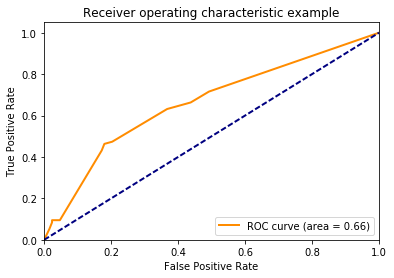

In [15]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# What's happening here is we are changing the cutoff value from 0 to 1.
# When we have a cutoff of zero this means that we have no positive predictions so both fpr and tpr are both 0
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

0.80269058296


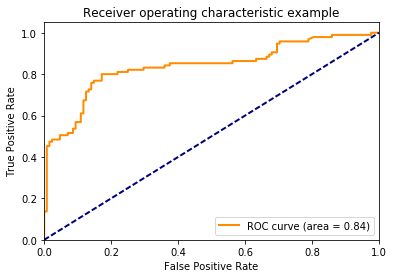

In [20]:
#split data into binaries where not binary
titanic_with_dummies = pd.get_dummies(data=titanic, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies['Age'] = titanic_with_dummies[['Age',"Parch","Sex_male",'Pclass_1', 'Pclass_2']].groupby(["Parch","Sex_male",'Pclass_1', 'Pclass_2'])['Age'].transform(lambda x: x.fillna(x.mean()))
feature_cols = ['Parch', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare', 'Age']
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### KNN Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.699551569507


In [23]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred_class = NB_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.780269058296


### Additional readings
* Logistic Regression applied to loan applications https://github.com/nborwankar/LearnDataScience
* Odds Ratio in Logistic Regression http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm

---

## Week 3 Lesson 2: Model Evaluation
6 - 8 June 2017

---

## Week 4 Lesson 1: Regularisation
7 - 13 June 2017

---

## Week 4 Lesson 2: Clustering
8 - 15 June 2017

---

## Week 5 Lesson 1: Recommendation Engines
9 - 20 June 2017

---

## Week 5 Lesson 2:
10 - 22 June 2017

---

## Week 6 Lesson 1:
11 - 27 June 2017

---

## Week 6 Lesson 2:
12 - 29 June 2017

---

## Week 7 Lesson 1:
13 - 4 July 2017

---

## Week 7 Lesson 2:
14 - 6 July 2017

---

## Week 8 Lesson 1:
15 - 11 July 2017

---

## Week 8 Lesson 2:
16 - 13 July 2017

---

## Week 9 Lesson 1:
17 - 18 July 2017

## Week 9 Lesson 2:
18 - 20 July 2017

---

## Week 10 Lesson 1:
19 - 25 July 2017

---

## Week 10 Lesson 2:
20 - 27 July 2017

---